# Content:
    - The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

    - Dataset columns:
    - Age (numeric)
    - Sex (text: male, female)
    - Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
    - Housing (text: own, rent, or free)
    - Saving accounts (text - little, moderate, quite rich, rich)
    - Checking account (numeric, in DM - Deutsch Mark)
    - Credit amount (numeric, in DM)
    - Duration (numeric, in month)
    - Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
    - Risk (Value target - Good or Bad Risk)

In [238]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import zscore

In [239]:
import pandas as pd
import numpy as np

df= pd.read_csv("credit_dataset.csv",index_col=0)

# Data Analysis

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [241]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [242]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [243]:
df.shape

(1000, 10)

In [244]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [245]:
print(df.nunique())
print(df.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [246]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [247]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [248]:
sum(df.isnull().sum())

0

In [249]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [250]:
# Handle outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
cleaned_dataset = df.copy()

#iterate over each numeric column
for col in df.select_dtypes(include=[np.number]).columns:
    median = df.select_dtypes(include=[np.number])[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

df = cleaned_dataset

C:\Users\PC\AppData\Local\Temp\ipykernel_11376\335273333.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2319.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [251]:
df.Risk.value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [252]:
Risk_counts = df['Risk'].value_counts().reset_index()  
Risk_counts.columns = ['Risk Variable', 'Count']  

# Créer un graphique en barres  
fig = px.bar(Risk_counts,   
              x='Risk Variable',   
              y='Count',   
              title='Target variable distribution',  
              color=['green','skyblue'],  # Optionnel : colorer les barres selon le nombre de cas  
              color_continuous_scale='Blues')  # Optionnel : choisir une échelle de couleur  

# Afficher la figure  
fig.show() 

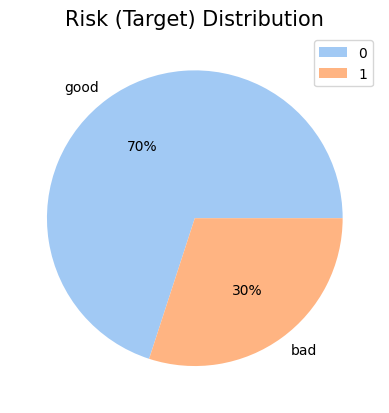

In [253]:
size = df.Risk.value_counts()
labels = df.Risk.value_counts().index
label=[0, 1]
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Risk (Target) Distribution', fontsize=15)
plt.show()

In [254]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169.0,6,radio/TV,good
1,22,female,2,own,little,moderate,5951.0,48,radio/TV,bad
2,49,male,1,own,little,little,2096.0,12,education,good
3,45,male,2,free,little,little,7882.0,42,furniture/equipment,good
4,53,male,2,free,little,little,4870.0,24,car,bad


# Age Distribution and Credit Risk

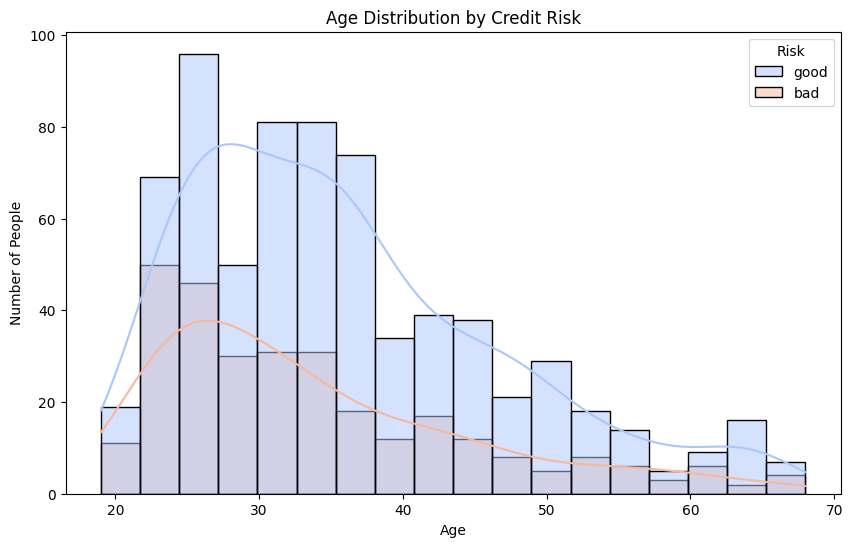

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Risk', kde=True, palette="coolwarm")
plt.title("Age Distribution by Credit Risk")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()

## Gender Distribution by Credit Risk

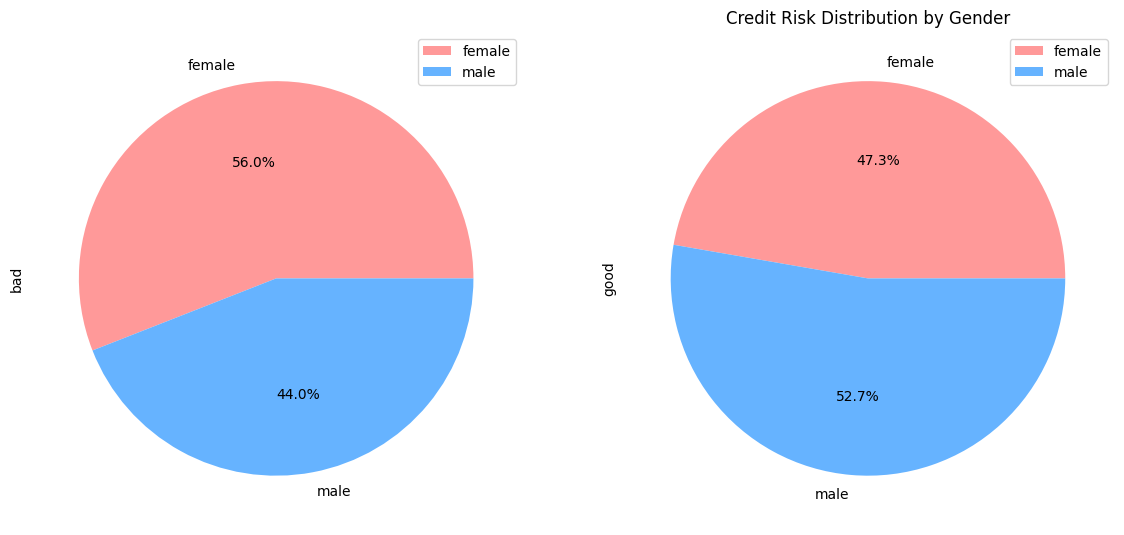

In [256]:
import matplotlib.pyplot as plt

# Calculate proportions
gender_risk = df.groupby('Sex')['Risk'].value_counts(normalize=True).unstack()

# Create pie charts for each gender
gender_risk.plot(kind='pie', subplots=True, figsize=(14, 7), autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Credit Risk Distribution by Gender")
plt.show()

## Duration of the loans distribuition and density

C:\Users\PC\AppData\Local\Temp\ipykernel_11376\2522824085.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\PC\AppData\Local\Temp\ipykernel_11376\2522824085.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




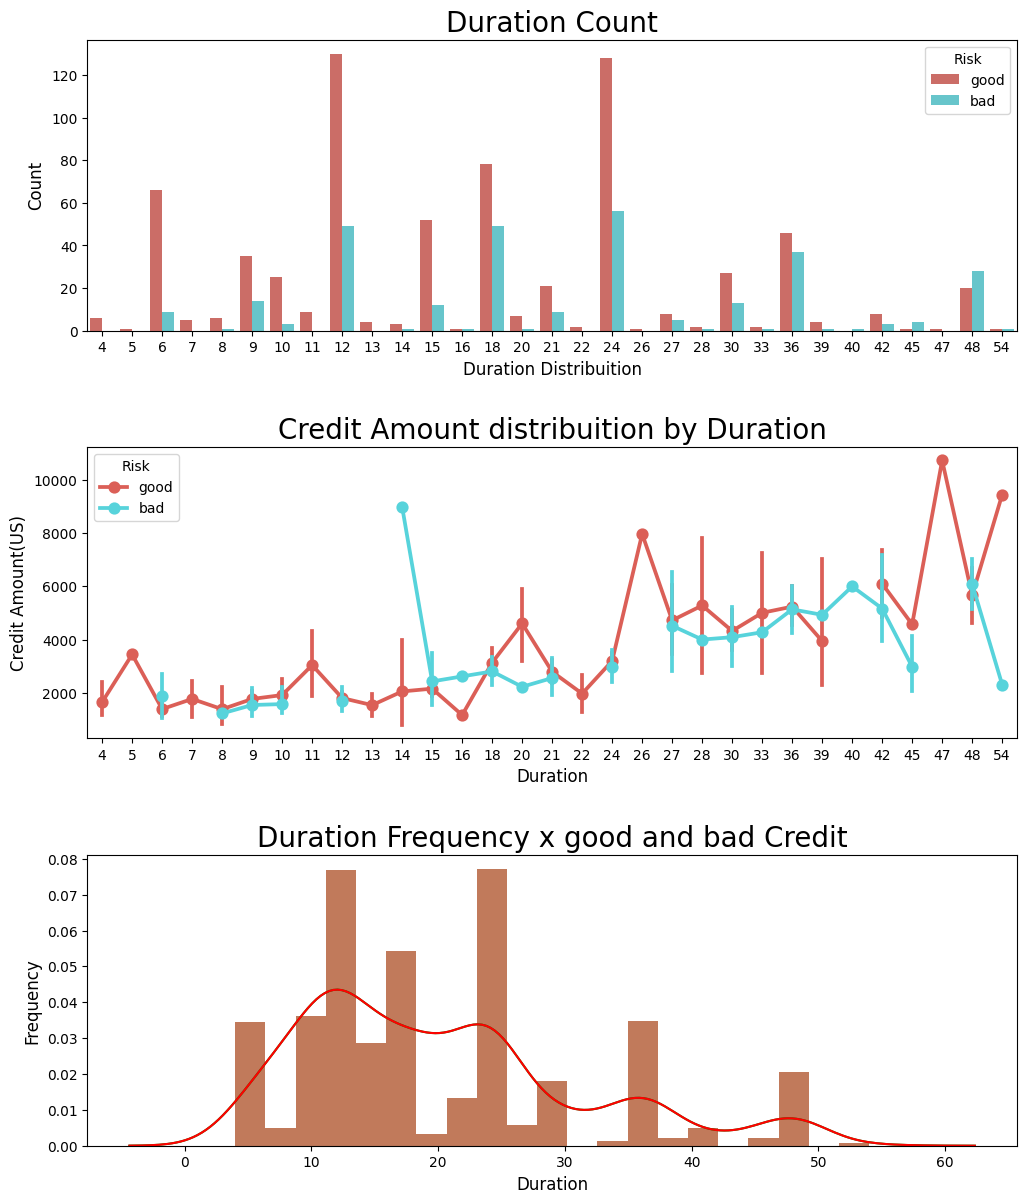

In [257]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df["Duration"], color='g')
g2 = sns.distplot(df["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

# Credit Risk by Job Category

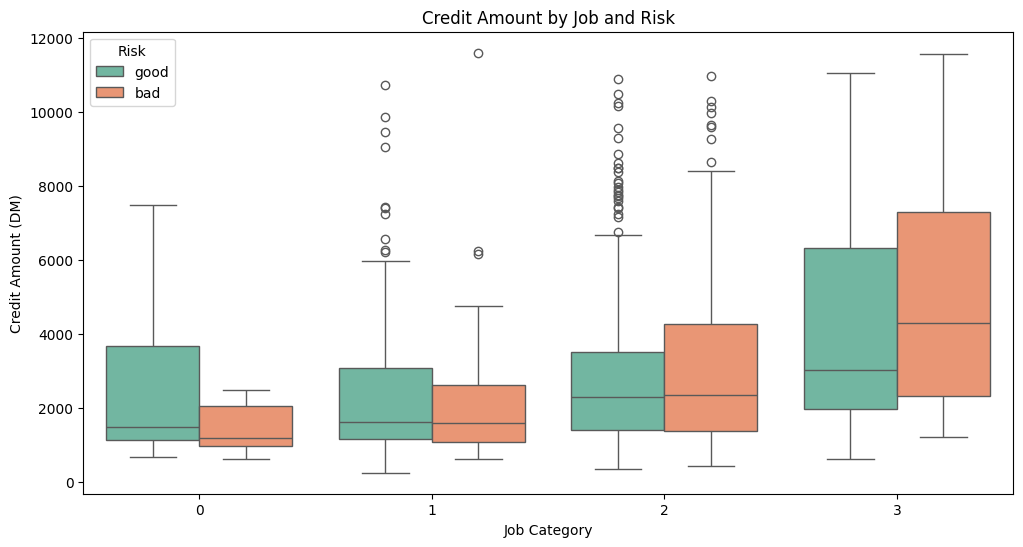

In [258]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Job", y="Credit amount", hue="Risk", data=df, palette="Set2")
plt.title("Credit Amount by Job and Risk")
plt.xlabel("Job Category")
plt.ylabel("Credit Amount (DM)")
plt.show()

# Credit Amount by Purpose

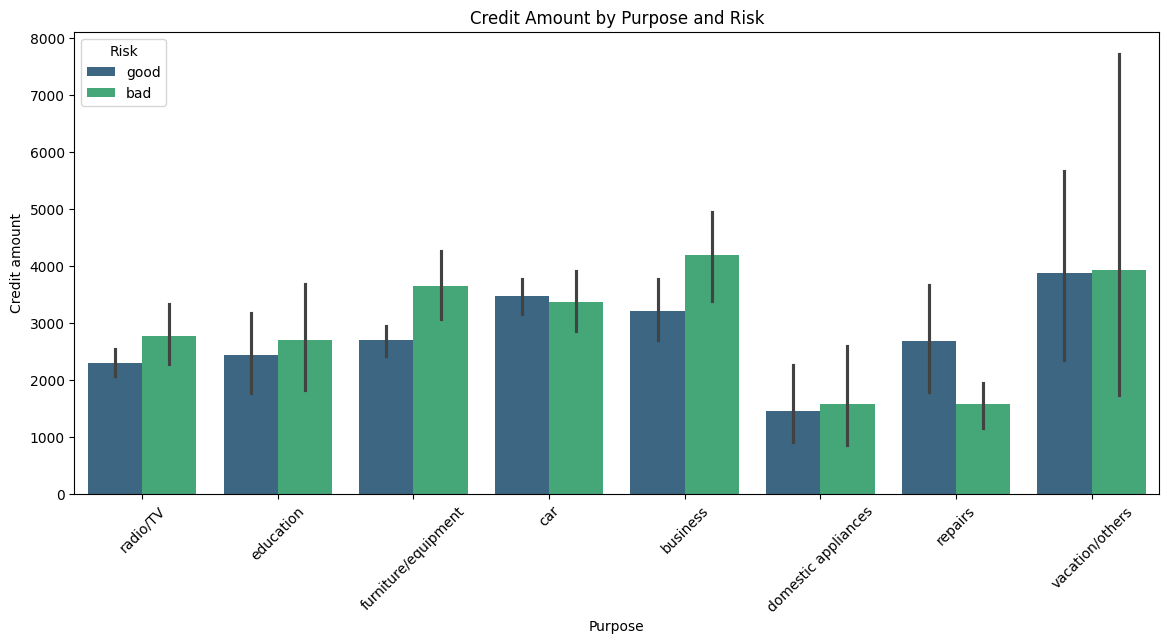

In [259]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Purpose', y='Credit amount', hue='Risk', data=df, palette='viridis')
plt.title("Credit Amount by Purpose and Risk")
plt.xticks(rotation=45)
plt.show()

## Correlation of Numeric Variables

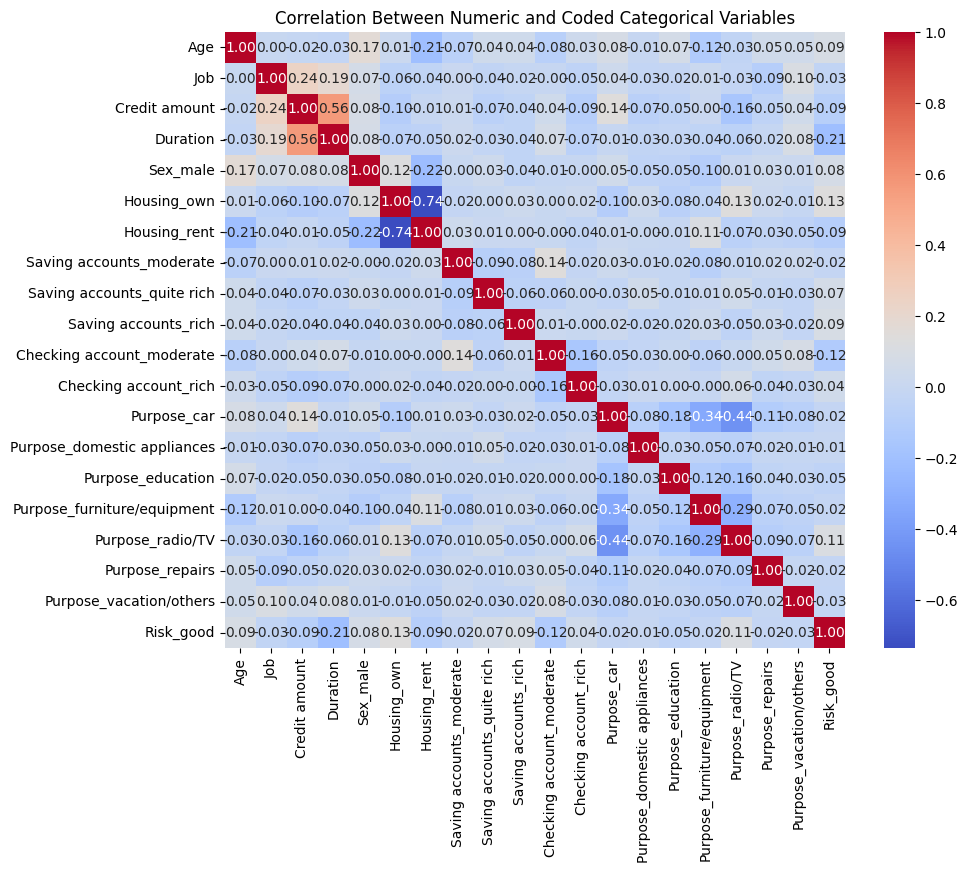

In [260]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix of the encoded DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Between Numeric and Coded Categorical Variables")
plt.show()

In [261]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in label_encoders.items():
    print("--------------------------------------------------------")
    print(f'{col}: {mapping}')

--------------------------------------------------------
Sex: {'female': 0, 'male': 1}
--------------------------------------------------------
Housing: {'free': 0, 'own': 1, 'rent': 2}
--------------------------------------------------------
Saving accounts: {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}
--------------------------------------------------------
Checking account: {'little': 0, 'moderate': 1, 'rich': 2}
--------------------------------------------------------
Purpose: {'business': 0, 'car': 1, 'domestic appliances': 2, 'education': 3, 'furniture/equipment': 4, 'radio/TV': 5, 'repairs': 6, 'vacation/others': 7}
--------------------------------------------------------
Risk: {'bad': 0, 'good': 1}


In [262]:
df['Risk'].value_counts().to_dict()

{1: 700, 0: 300}

In [263]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169.0,6,5,1
1,22,0,2,1,0,1,5951.0,48,5,0
2,49,1,1,1,0,0,2096.0,12,3,1
3,45,1,2,0,0,0,7882.0,42,4,1
4,53,1,2,0,0,0,4870.0,24,1,0


# ML_Classification

In [264]:
# Feature and target selection
X = df.drop('Risk', axis=1)
y = df['Risk']

In [265]:
# Splitting X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [266]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [267]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# 1. Histogram-based Gradient Boosting Classification Tree.
hg = HistGradientBoostingClassifier(loss= 'log_loss')
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

print("--- HistGradientBoostingClassifier Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hg))
print("Classification Report:\n", classification_report(y_test, y_pred_hg))
cm = confusion_matrix(y_test, y_pred_hg)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])   
print("Specificity:", specificity)
print("\n")

--- HistGradientBoostingClassifier Forest ---
Confusion Matrix:
 [[ 22  50]
 [ 26 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.31      0.37        72
           1       0.75      0.85      0.80       178

    accuracy                           0.70       250
   macro avg       0.61      0.58      0.58       250
weighted avg       0.67      0.70      0.68       250

Specificity: 0.3055555555555556




In [268]:
# 2. Extreme Gradient Boosting Classification Tree.
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("--- XGBoost Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- XGBoost Classifier ---
Confusion Matrix:
 [[ 23  49]
 [ 26 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38        72
           1       0.76      0.85      0.80       178

    accuracy                           0.70       250
   macro avg       0.61      0.59      0.59       250
weighted avg       0.67      0.70      0.68       250

Specificity: 0.3194444444444444




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[18:47:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [269]:
# 3. Random Forest Classification Tree.
rf = RandomForestClassifier(n_estimators=68, criterion='gini', max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Random Forest Classifier ---
Confusion Matrix:
 [[ 10  62]
 [ 20 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.14      0.20        72
           1       0.72      0.89      0.79       178

    accuracy                           0.67       250
   macro avg       0.53      0.51      0.50       250
weighted avg       0.61      0.67      0.62       250

Specificity: 0.1388888888888889




In [270]:
# 4. Multi-layer Perceptron classifier (MLP)
mlp = MLPClassifier(max_iter=222, activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("--- MLP Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- MLP Classifier ---
Confusion Matrix:
 [[ 21  51]
 [ 26 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.29      0.35        72
           1       0.75      0.85      0.80       178

    accuracy                           0.69       250
   macro avg       0.60      0.57      0.58       250
weighted avg       0.66      0.69      0.67       250

Specificity: 0.2916666666666667




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.



In [271]:
# 5. Logistic Regression
lr = LogisticRegression(C=10, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[ 41  31]
 [ 66 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.57      0.46        72
           1       0.78      0.63      0.70       178

    accuracy                           0.61       250
   macro avg       0.58      0.60      0.58       250
weighted avg       0.67      0.61      0.63       250

Specificity: 0.5694444444444444




In [272]:
models = ['Histogram-Boost', 'XGBoost', 'Random Forests', 'Multi-layer Perceptron', 'Logistic Regression']
accuracy_scores = [
    accuracy_score(y_test, y_pred_hg),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_lr)
]

f1_scores = [
    f1_score(y_test, y_pred_hg),
    f1_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_mlp),
    f1_score(y_test, y_pred_lr)
]

results = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores,
    'F1 Score': f1_scores
})

results.set_index('Model').sort_values(by='Accuracy Score', ascending=False)

,Accuracy Score,F1 Score
Model,,
XGBoost,0.700,0.802111
Histogram-Boost,0.696,0.800000
Multi-layer Perceptron,0.692,0.797900
Random Forests,0.672,0.793970
Logistic Regression,0.612,0.697819


## Visualizing Model Performance

C:\Users\PC\AppData\Local\Temp\ipykernel_11376\1717454604.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PC\AppData\Local\Temp\ipykernel_11376\1717454604.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




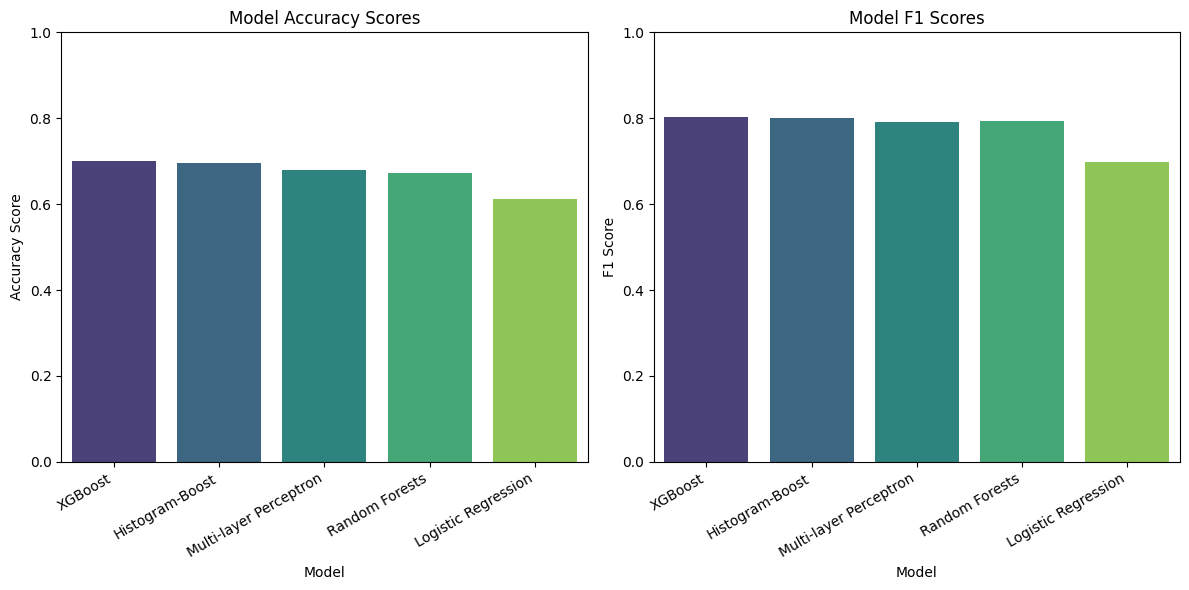

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for the results
data = {
    'Model': ['XGBoost', 'Histogram-Boost', 'Multi-layer Perceptron', 'Random Forests', 'Logistic Regression'],
    'Accuracy Score': [0.700, 0.696, 0.680, 0.672, 0.612],
    'F1 Score': [0.802111, 0.800000, 0.790576, 0.793970, 0.697819]
}

df_results = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the accuracy scores
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy Score', data=df_results, palette='viridis')
plt.title('Model Accuracy Scores')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')

# Adjusting x-tick labels for better spacing
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them to the right

# Plotting the F1 scores
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1 Score', data=df_results, palette='viridis')
plt.title('Model F1 Scores')
plt.ylim(0, 1)
plt.ylabel('F1 Score')

# Adjusting x-tick labels for better spacing
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them to the right

# Show the plots
plt.tight_layout()
plt.show()


## Model Selection Interpretation
    - Among the evaluated models, XGBoost proved to be the most effective for credit risk classification, achieving an accuracy score of 0.700 and an impressive F1 score of 0.802111. Its ability to capture complex relationships in the data, combined with strong performance metrics, makes XGBoost the preferred choice for accurately distinguishing between good and bad credit risks.


In [274]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5, 6],        # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],     # Fraction of samples used for fitting
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV on your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on your test data (X_test, y_test)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Test Accuracy: 0.7080
Test F1 Score: 0.8206
